## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Helping functions

In [2]:
def plotall(loss_history, thetas_history):

    # number of thetas
    n_thetas = thetas_history.shape[1]

    # plot loss vs iterations
    plt.plot(loss_history, '-m.', markersize=12)
    plt.grid("True")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.show()

    # plot loss vs thetas
    fig, axes = plt.subplots(nrows=n_thetas,
                             ncols=1,
                             figsize=(6, 6 * n_thetas))
    plt.suptitle("Loss vs thetas")
    for i in range(0, n_thetas):
        axes[i].grid()
        axes[i].plot(thetas_history[:, i], loss_history, '-m.', markersize=12)
        axes[i].set_title(f"Theta {i}")
        axes[i].set_xlabel(f"Theta{i}")
        axes[i].set_ylabel("loss")
    plt.show()

In [3]:
def minmaxscale(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

In [4]:
def chunker(data, size):
    return (data[pos:pos + size, :] for pos in range(0, data.shape[0], size))

## The data

In [5]:
a1 = np.linspace(0, 20)
a2 = np.linspace(10, 100)
a3 = np.linspace(-7, -15)
x1 = np.column_stack((a1, a2, a3))
y1 = a1 + 2 * a2 + 3 * a3

In [6]:
data = np.genfromtxt('MultiVarLR.csv', delimiter=',')
x2 = data[:, :-1]
y2 = data[:, -1]

## Gradiend descent for multivariate

In [7]:
def gradient_descent(x,
                     y,
                     lr,
                     max_itr=500,
                     scale=False,
                     gra_threshold=.01,
                     conv_threshold=.01):

    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # append column of ones
    x = np.column_stack((np.ones(x.shape[0]), x))

    # number of rows and columns
    n, m = x.shape[0], x.shape[1]

    # initializing thetas, loss history, thetas_history, j
    thetas = np.zeros(m)
    loss_history = []
    thetas_history = np.array(thetas)
    j = np.inf

    for i in range(1, max_itr + 1):
        print(f"****************** Iteration {i} ********************\n")
        y_pred = x @ thetas
        print(f"h(x):{y_pred}\n")

        error = y_pred - y
        print(f"Error Vector: {error}\n")

        j_new = .5 * (1 / n) * (np.linalg.norm(error)**2)
        convergence = np.abs(j - j_new)
        j = j_new
        loss_history.append(j)
        print(f"j= {j}\n")

        gradient = (1 / n) * x.T @ error
        print(f"Gradient Vector:{gradient}\n")

        gradient_norm = np.linalg.norm(gradient)
        print(f"Gradient Vector Norm:{gradient_norm}\n")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} iterations\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Error Vector: {error}\n")
            print(f"Cost= {j}\n")
            print(f"h(x) = y_predict:{y_pred}\n")
            print(f"y_actual:{y}\n")
            break
        thetas = thetas - lr * gradient
        print(f"thetas_new= {thetas}\n")

        thetas_history = np.row_stack((thetas_history, thetas))
    else:
        thetas_history = thetas_history[:-1, :]

    return thetas, y_pred, loss_history, thetas_history

# Example 1

In [8]:
thetas, y_pred, loss_history, thetas_history = gradient_descent(
    x1,
    y1,
    scale=True,
    lr=.3,
    max_itr=1000,
    gra_threshold=.001,
    conv_threshold=.001)

****************** Iteration 1 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: [   1.           -2.59183673   -6.18367347   -9.7755102   -13.36734694
  -16.95918367  -20.55102041  -24.14285714  -27.73469388  -31.32653061
  -34.91836735  -38.51020408  -42.10204082  -45.69387755  -49.28571429
  -52.87755102  -56.46938776  -60.06122449  -63.65306122  -67.24489796
  -70.83673469  -74.42857143  -78.02040816  -81.6122449   -85.20408163
  -88.79591837  -92.3877551   -95.97959184  -99.57142857 -103.16326531
 -106.75510204 -110.34693878 -113.93877551 -117.53061224 -121.12244898
 -124.71428571 -128.30612245 -131.89795918 -135.48979592 -139.08163265
 -142.67346939 -146.26530612 -149.85714286 -153.44897959 -157.04081633
 -160.63265306 -164.2244898  -167.81632653 -171.40816327 -175.        ]

j= 5127.846938775511

Gradient Vector:[-87.         -58.76530

In [9]:
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.999995527739408


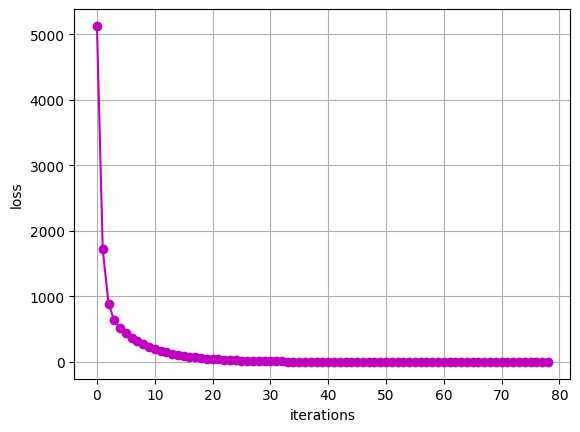

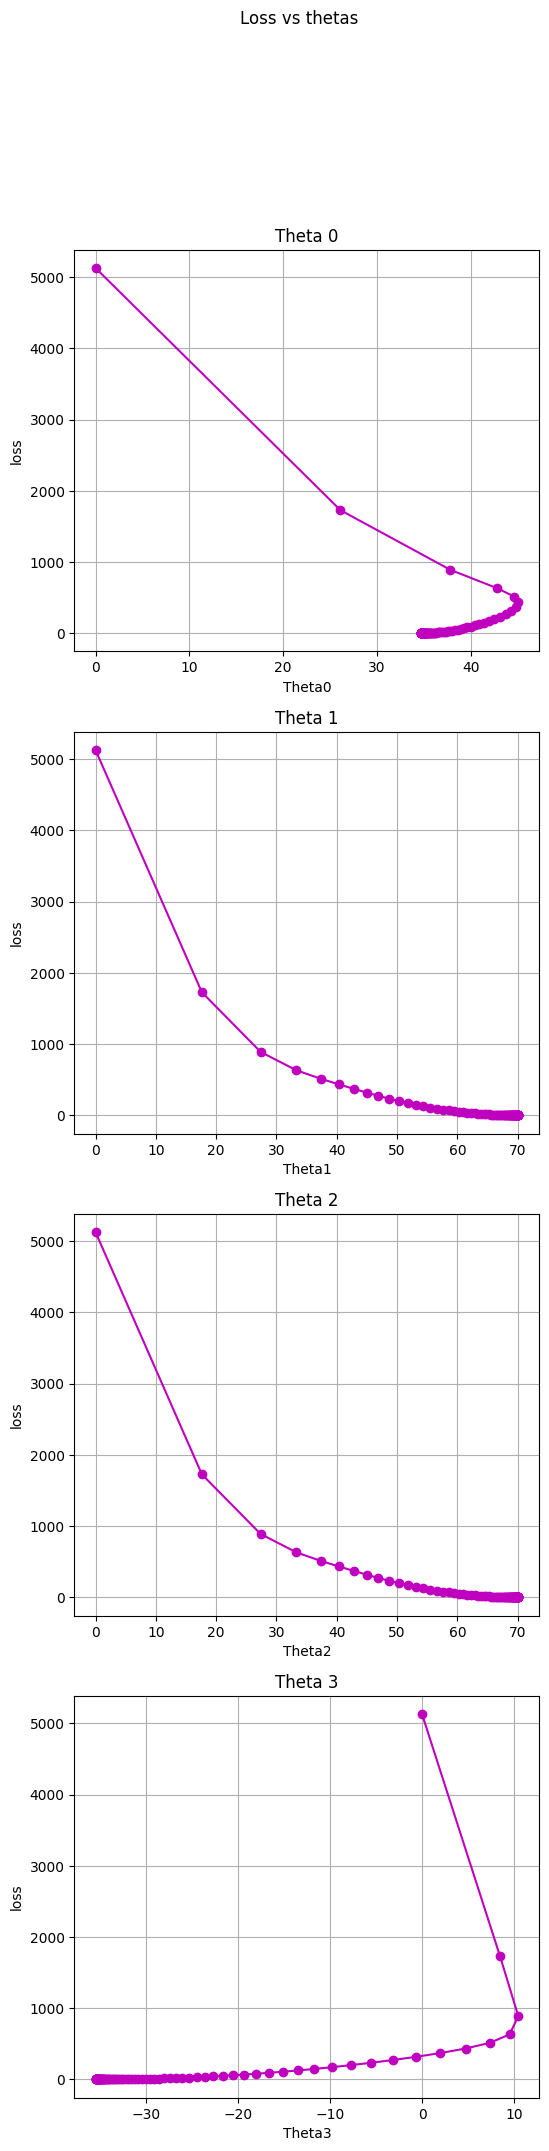

In [10]:
plotall(loss_history, thetas_history)

## Stochastic gradient descent

In [11]:
def Stochastic_gradient_descent(x,
                                y,
                                lr,
                                max_epochs=500,
                                scale=False,
                                gra_threshold=.01,
                                conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # split data
    x = data[:, :-1]
    y = data[:, -1]

    # append column of ones
    x = np.column_stack((np.ones(x.shape[0]), x))

    # number of rows and columns
    n, m = x.shape[0], x.shape[1]

    # initializing thetas, loss history, thetas_history
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)

    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for row in range(n):
            y_pred = x[row, :] @ thetas
            error = y_pred - y[row]
            j = .5 * (error**2)
            loss_history.append(j)
            gradient = x[row, :] * error
            gradient_norm = np.linalg.norm(gradient)
            thetas = thetas - lr * gradient
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 3

In [12]:
thetas, loss_history, thetas_history = Stochastic_gradient_descent(
    x1,
    y1,
    lr = .6,
    max_epochs=500,
    scale=True,
    gra_threshold=.01,
    conv_threshold=.01)

****************** Epoch 1 ********************

Cost= 5.976251128093179e-06
Gradient vector: [0.00345724 0.00282224 0.00282224 0.000635  ]
Gradient Vector Norm: 0.00531843617586873
Thetas: [ 34.5986729   70.20008221  70.20008221 -35.60140931]
****************** Training Report ********************

Gradient Descent converged after 1 epochs

thetas_Opt= [ 34.5986729   70.20008221  70.20008221 -35.60140931]

Cost:5.976251128093179e-06



In [13]:
y_pred = np.column_stack((np.ones(x1.shape[0]), minmaxscale(x1))) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.999999998505405


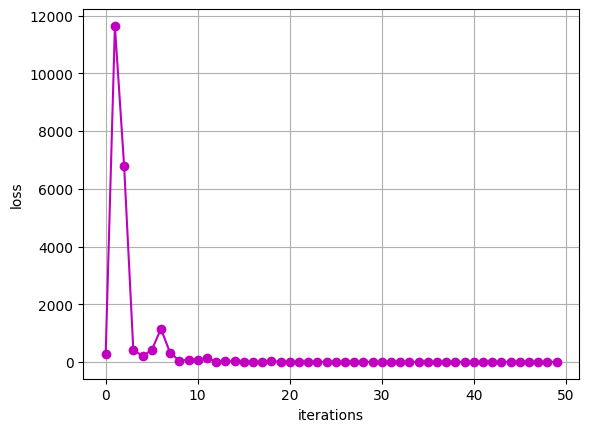

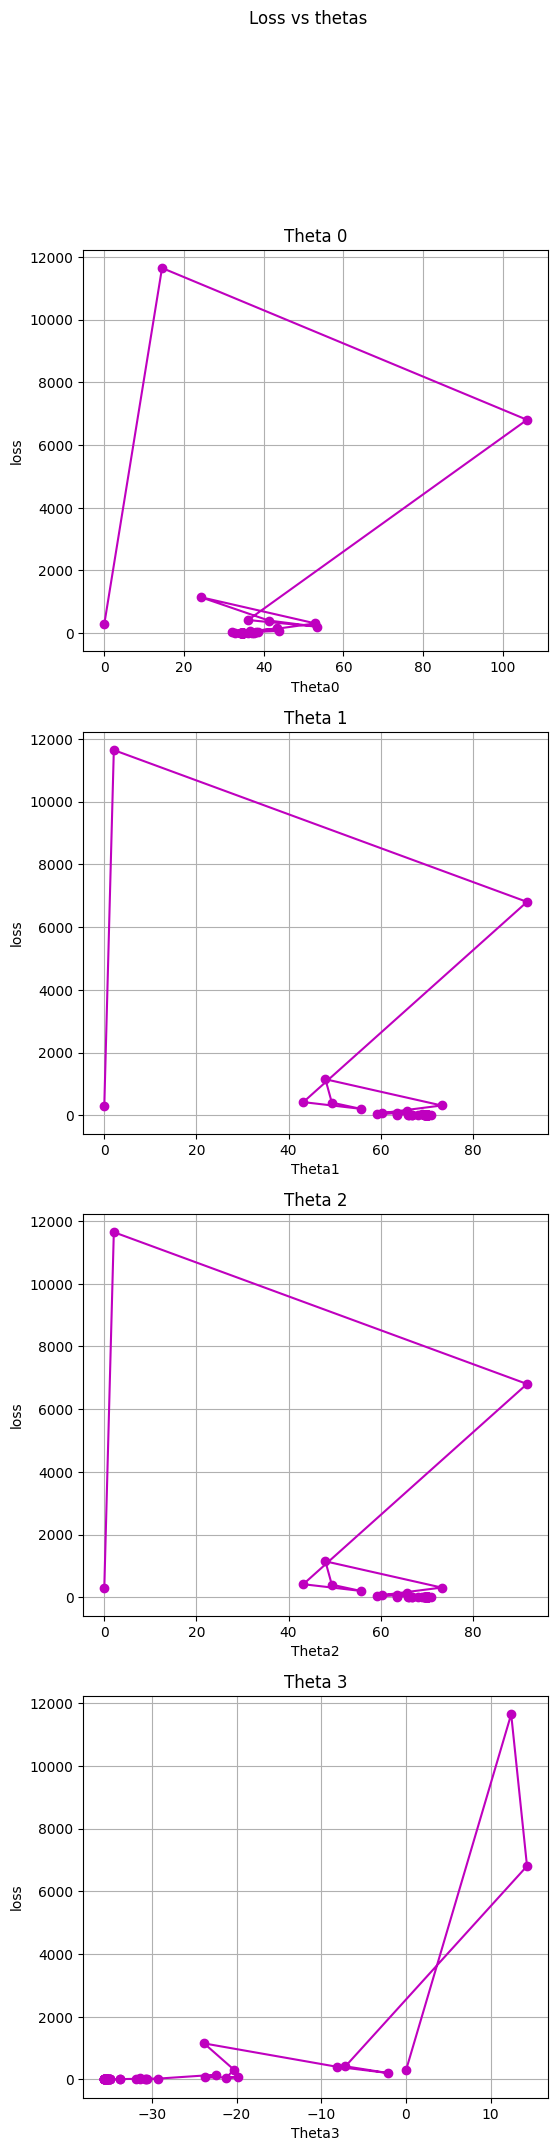

In [14]:
plotall(loss_history, thetas_history)

# Example 3

In [18]:
thetas, loss_history, thetas_history = Stochastic_gradient_descent(
    x2,
    y2,
    .1,
    max_epochs=500,
    scale=True,
    gra_threshold=.01,
    conv_threshold=.01)

****************** Epoch 1 ********************

Cost= 1.0978393735003409
Gradient vector: [-1.48178229 -1.20961819 -0.94036184 -1.15249733]
Gradient Vector Norm: 2.4230941811556796
Thetas: [77.55117562 45.95106822 46.23573681 37.94180677]
****************** Epoch 2 ********************

Cost= 0.524881014859443
Gradient vector: [-1.02457895 -0.83639098 -0.65021357 -0.79689474]
Gradient Vector Norm: 1.675449436107473
Thetas: [81.69481421 44.00549923 44.50875632 36.49601285]
****************** Epoch 3 ********************

Cost= 0.39888047444723174
Gradient vector: [-0.89317465 -0.72912216 -0.56682237 -0.69469139]
Gradient Vector Norm: 1.4605696848113179
Thetas: [85.02526702 42.30202623 42.9995721  35.35706913]
****************** Epoch 4 ********************

Cost= 0.3056872213864227
Gradient vector: [-0.78190437 -0.63828928 -0.49620854 -0.60814784]
Gradient Vector Norm: 1.278614236218022
Thetas: [87.76416626 40.84858871 41.72062621 34.50944269]
****************** Epoch 5 ***************

In [19]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), minmaxscale(x2))) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9754189935404347


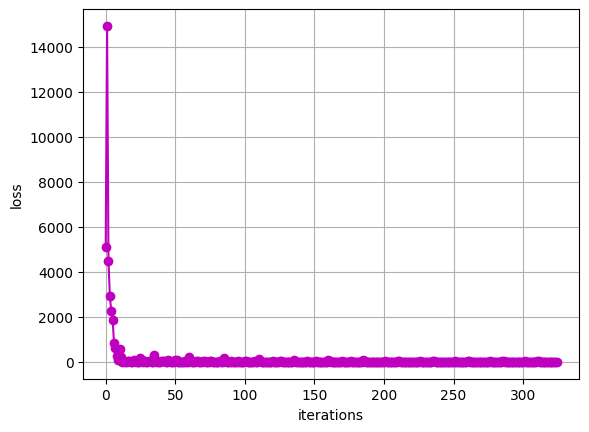

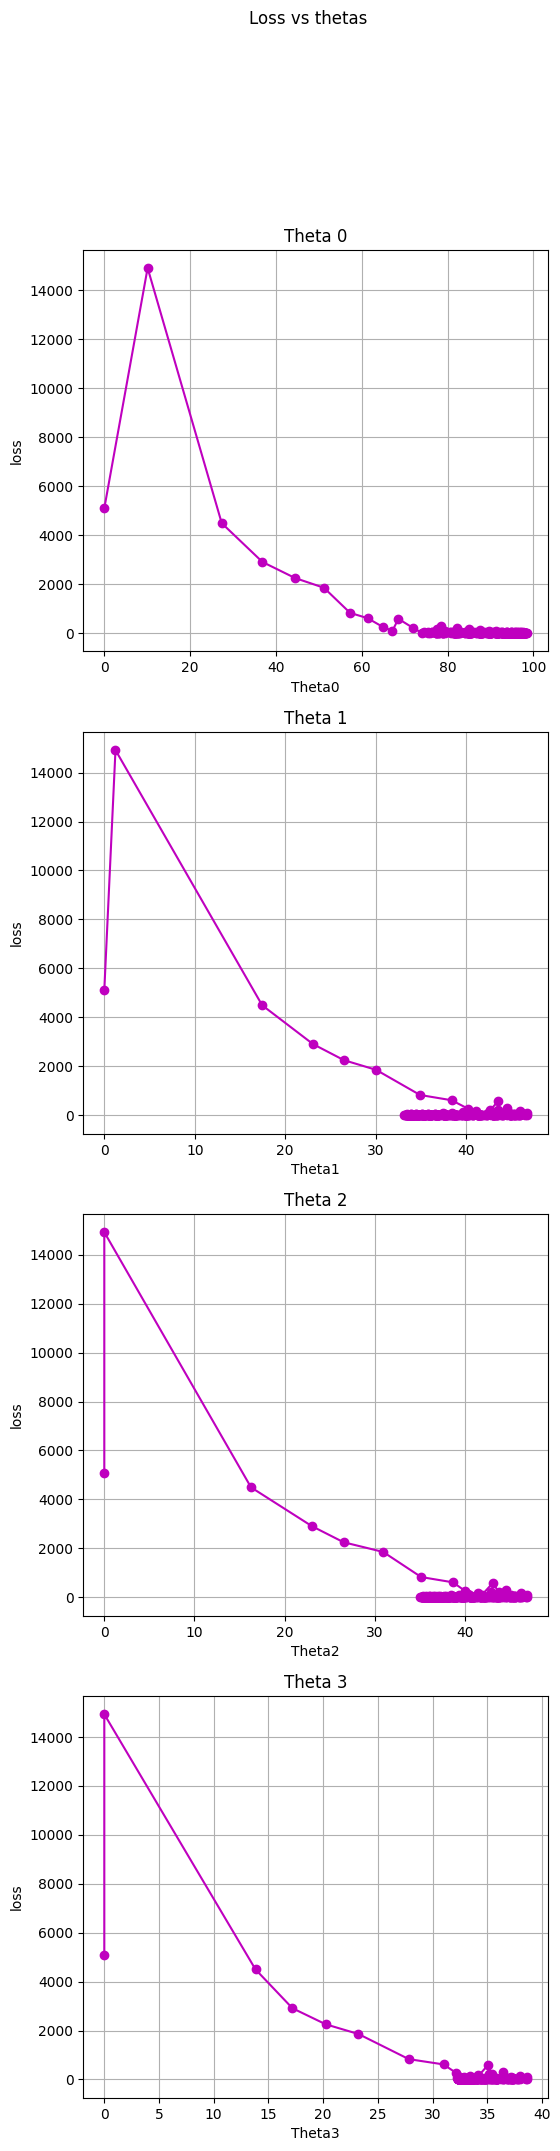

In [20]:
plotall(loss_history, thetas_history)

# Mini batch gradient descent

In [21]:
def Mini_batch_gradient_descent(x,
                                y,
                                lr,
                                max_epochs=500,
                                scale=False,
                                batch_size=5,
                                gra_threshold=.01,
                                conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # append column of ones
    data = np.column_stack((np.ones(x.shape[0]), data))

    # number of rows and columns and batches
    n, m = data.shape[0], (data.shape[1] - 1)
    n_batches = len(y) // batch_size

    # initializing thetas, loss history, thetas_history
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)

    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for chunk in chunker(data, batch_size):
            x = chunk[:, :-1]
            y = chunk[:, -1]
            y_pred = x @ thetas
            error = y_pred - y
            j = .5 * (1 / batch_size) * (np.linalg.norm(error)**2)
            loss_history.append(j)
            gradient = (1 / batch_size) * x.T @ error
            gradient_norm = np.linalg.norm(gradient)
            thetas = thetas - lr * gradient
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n_batches + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 4

In [22]:
thetas, loss_history, thetas_history = Mini_batch_gradient_descent(
    x1,
    y1,
    lr=.6,
    max_epochs=500,
    batch_size=25,
    scale=True,
    gra_threshold=.01,
    conv_threshold=.01)

****************** Epoch 1 ********************

Cost= 778.5538175767558
Gradient vector: [  2.85151235 -10.59646794 -10.59646794  13.44798029]
Gradient Vector Norm: 20.335918027216
Thetas: [48.72190892 39.05769584 39.05769584  9.66421308]
****************** Epoch 2 ********************

Cost= 418.7066146917924
Gradient vector: [-1.16664277 -9.47031022 -9.47031022  8.30366745]
Gradient Vector Norm: 15.80143980581139
Thetas: [44.97498984 47.67948586 47.67948586 -2.70449602]
****************** Epoch 3 ********************

Cost= 220.2961955511616
Gradient vector: [-0.85708449 -6.87478052 -6.87478052  6.01769602]
Gradient Vector Norm: 11.466144671584319
Thetas: [ 42.12535752  53.86624873  53.86624873 -11.74089121]
****************** Epoch 4 ********************

Cost= 115.88696604241892
Gradient vector: [-0.6216745  -4.98625226 -4.98625226  4.36457776]
Gradient Vector Norm: 8.316335813386614
Thetas: [ 40.05809251  58.35324124  58.35324124 -18.29514873]
****************** Epoch 5 *********

In [23]:
y_pred = np.column_stack((np.ones(x1.shape[0]), minmaxscale(x1))) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.999996327849544


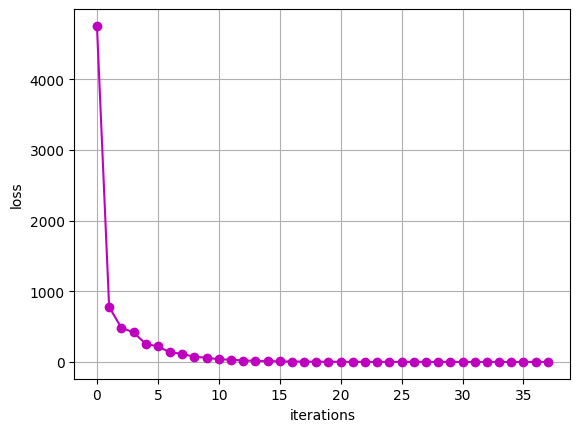

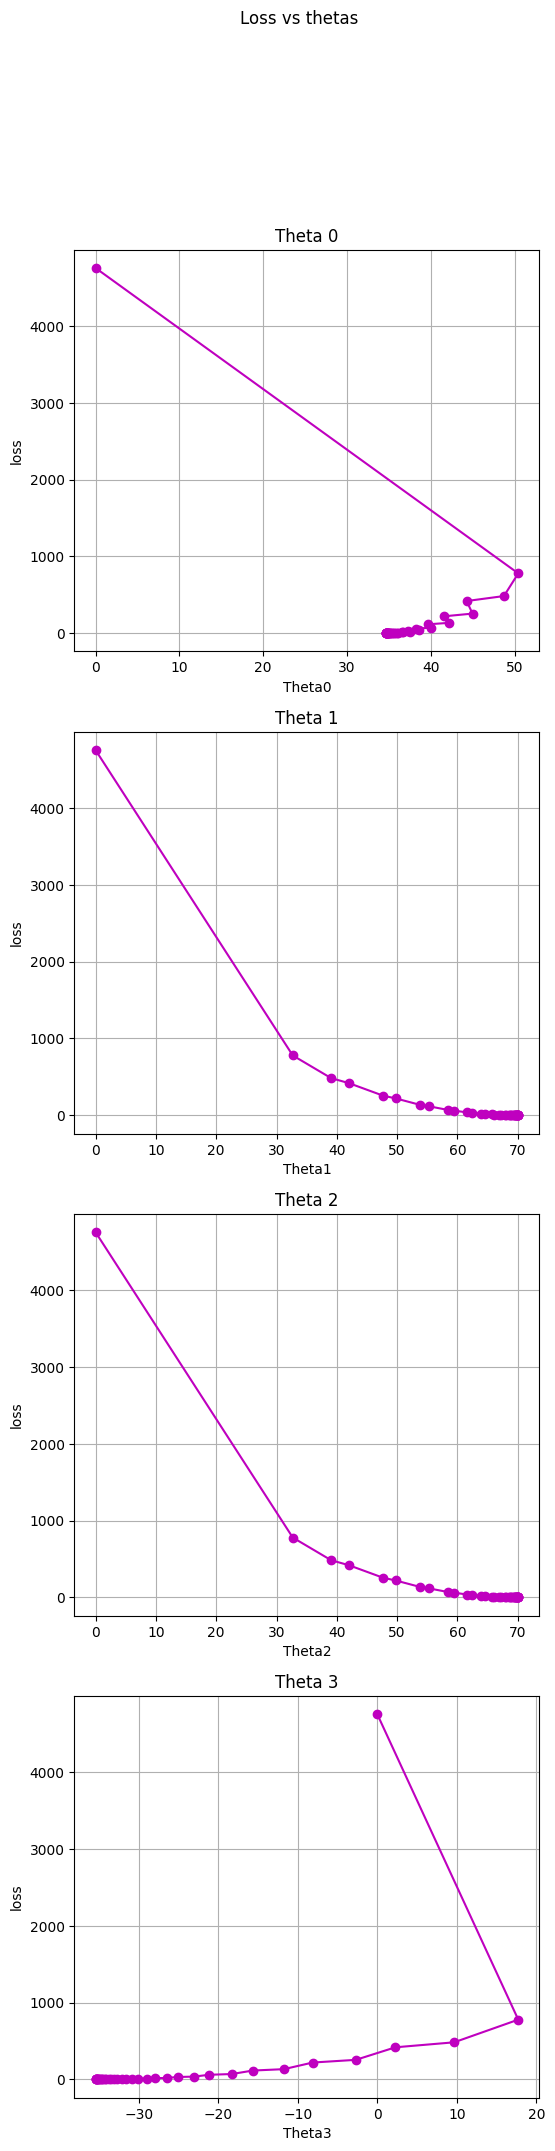

In [24]:
plotall(loss_history, thetas_history)

# Example 5

In [25]:
thetas, loss_history, thetas_history = Mini_batch_gradient_descent(
    x2,
    y2,
    lr=.7,
    max_epochs=500,
    batch_size=5,
    scale=True,
    gra_threshold=.001,
    conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 302.5179854099094
Gradient vector: [-24.47676976 -17.6323417  -16.54820945 -14.86853421]
Gradient Vector Norm: 37.48237288822356
Thetas: [90.6869705  44.44887355 49.42828815 40.00601734]
****************** Epoch 2 ********************

Cost= 8.427045765897246
Gradient vector: [-3.50634872 -2.32097561 -2.14710331 -2.03751096]
Gradient Vector Norm: 5.142267274105977
Thetas: [88.13849566 39.07665603 43.26579562 35.09414613]
****************** Epoch 3 ********************

Cost= 11.181799909963203
Gradient vector: [-4.31473177 -3.05734503 -2.80506655 -2.68205806]
Gradient Vector Norm: 6.559428533755663
Thetas: [91.44018976 37.78527724 41.67967292 34.05085333]
****************** Epoch 4 ********************

Cost= 8.828958551094471
Gradient vector: [-3.71042776 -2.71638926 -2.4613853  -2.41421567]
Gradient Vector Norm: 5.747425486954996
Thetas: [93.59635716 36.54363836 40.165194   33.1779953 ]
****************** Epoch 5 ****************

In [26]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), minmaxscale(x2))) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9850885998165019


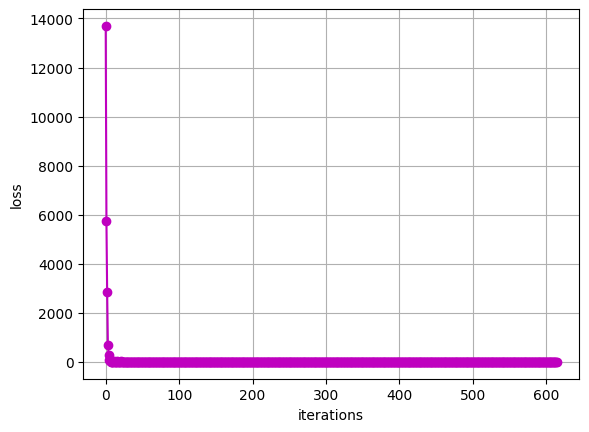

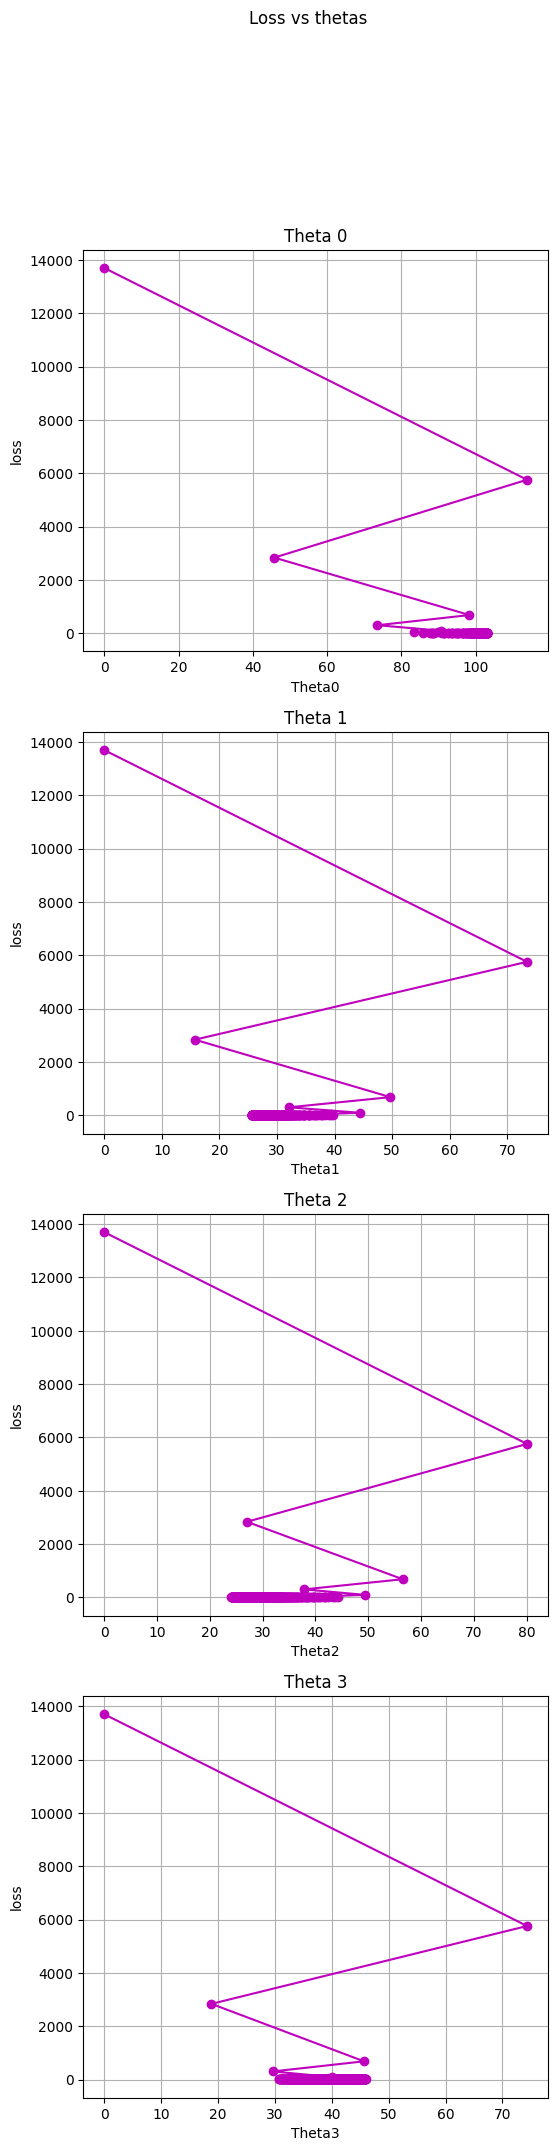

In [27]:
plotall(loss_history, thetas_history)